## Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

Results: You have to build a solution that should able to predict the probability of credit
default based on credit card owner’s characteristics and payment history.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
# default payment (Yes = 1, No = 0)
# Column Information
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

## EDA  and Data Cleaning

In [3]:
data = pd.read_csv("Credit Card Defaulter Prediction.csv")

In [4]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [6]:
# no null value in data set
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
# No duplicet value in data set
data.duplicated().sum()

0

In [8]:
data.shape

(30000, 25)

In [9]:
# drop unwanted value from data
data.drop("ID",axis=1,inplace=True)

In [10]:
# saprate catigorical columns and numerical colums
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'default '], dtype='object')
Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [11]:
# fetch the unique value of catigorical features
for i in catigorical_features:
    print(i,data[i].unique())
    print("*"*80)

SEX ['F' 'M']
********************************************************************************
EDUCATION ['University' 'Graduate school' 'High School' 'Unknown' 'Others' '0']
********************************************************************************
MARRIAGE ['Married' 'Single' 'Other' '0']
********************************************************************************
default  ['Y' 'N']
********************************************************************************


In [12]:
# replace unwanted values with actual value
data["EDUCATION"] = data["EDUCATION"].replace("Others","Unknown")
data["EDUCATION"] = data["EDUCATION"].replace("0","University")

In [13]:
data["MARRIAGE"] = data["MARRIAGE"].replace("0","Single")
data["MARRIAGE"] = data["MARRIAGE"].replace("Other","Married")

In [14]:
# change column name for better understanding
data["Default "] = data["default "]
data.drop("default ",axis=1,inplace=True)

'default '


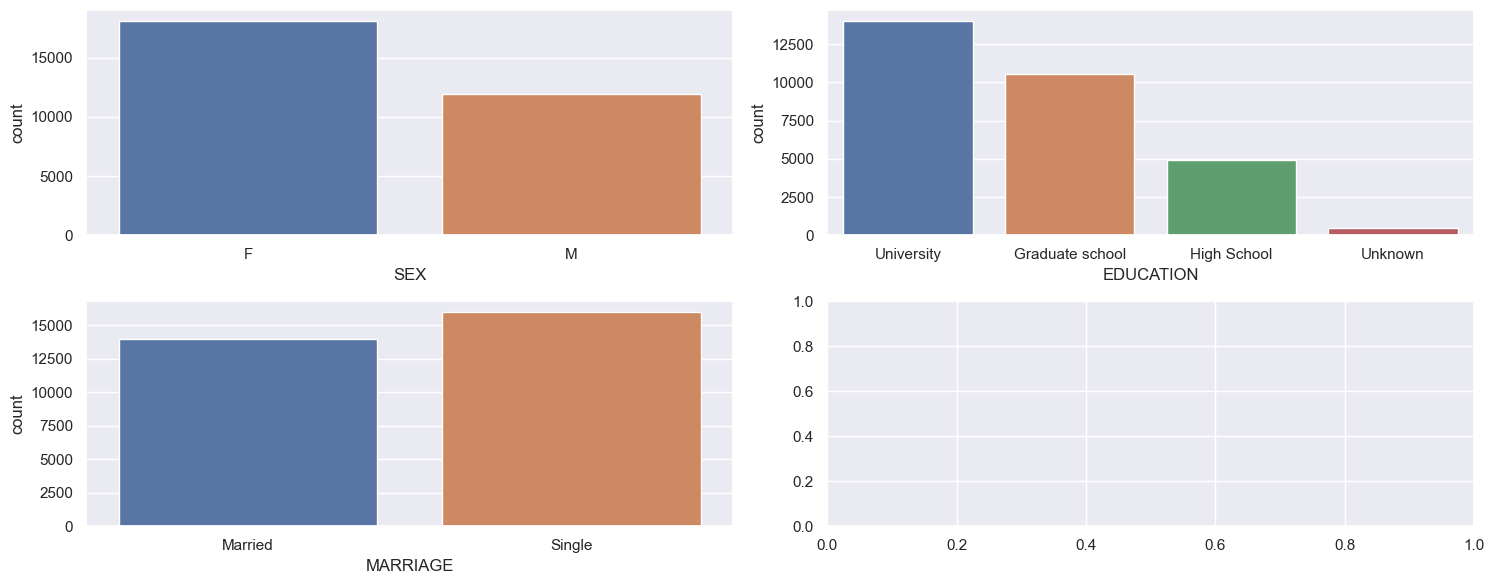

In [15]:
try:
    for i in range(len(catigorical_features)):
        plt.subplot(2,2,i+1)
        sns.countplot(x = data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

observation NOT Default are more then DEFAUT


<AxesSubplot:ylabel='Default '>

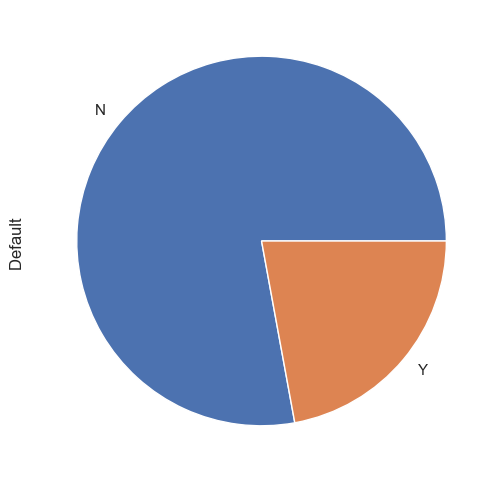

In [16]:
print("observation NOT Default are more then DEFAUT")
data["Default "].value_counts().plot.pie()

In [17]:
# Do Encoding on catigorical data
data["SEX"] = data["SEX"].map({'F':0,'M':1})
data["MARRIAGE"] = data["MARRIAGE"].map({'Married':0,'Single':1})
data["EDUCATION"] = data["EDUCATION"].map({'University':4,'Graduate school':3, 'High School':2, 'Unknown':1})
data["Default "] = data["Default "].map({"Y":1,"N":0})

In [18]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,3.273967,0.533933,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.785830,0.498856,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,3.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,3.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,1.000000,4.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,1.000000,4.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"LIMIT_BAL",'MARRIAGE'],axis=1,inplace=True)

<AxesSubplot:>

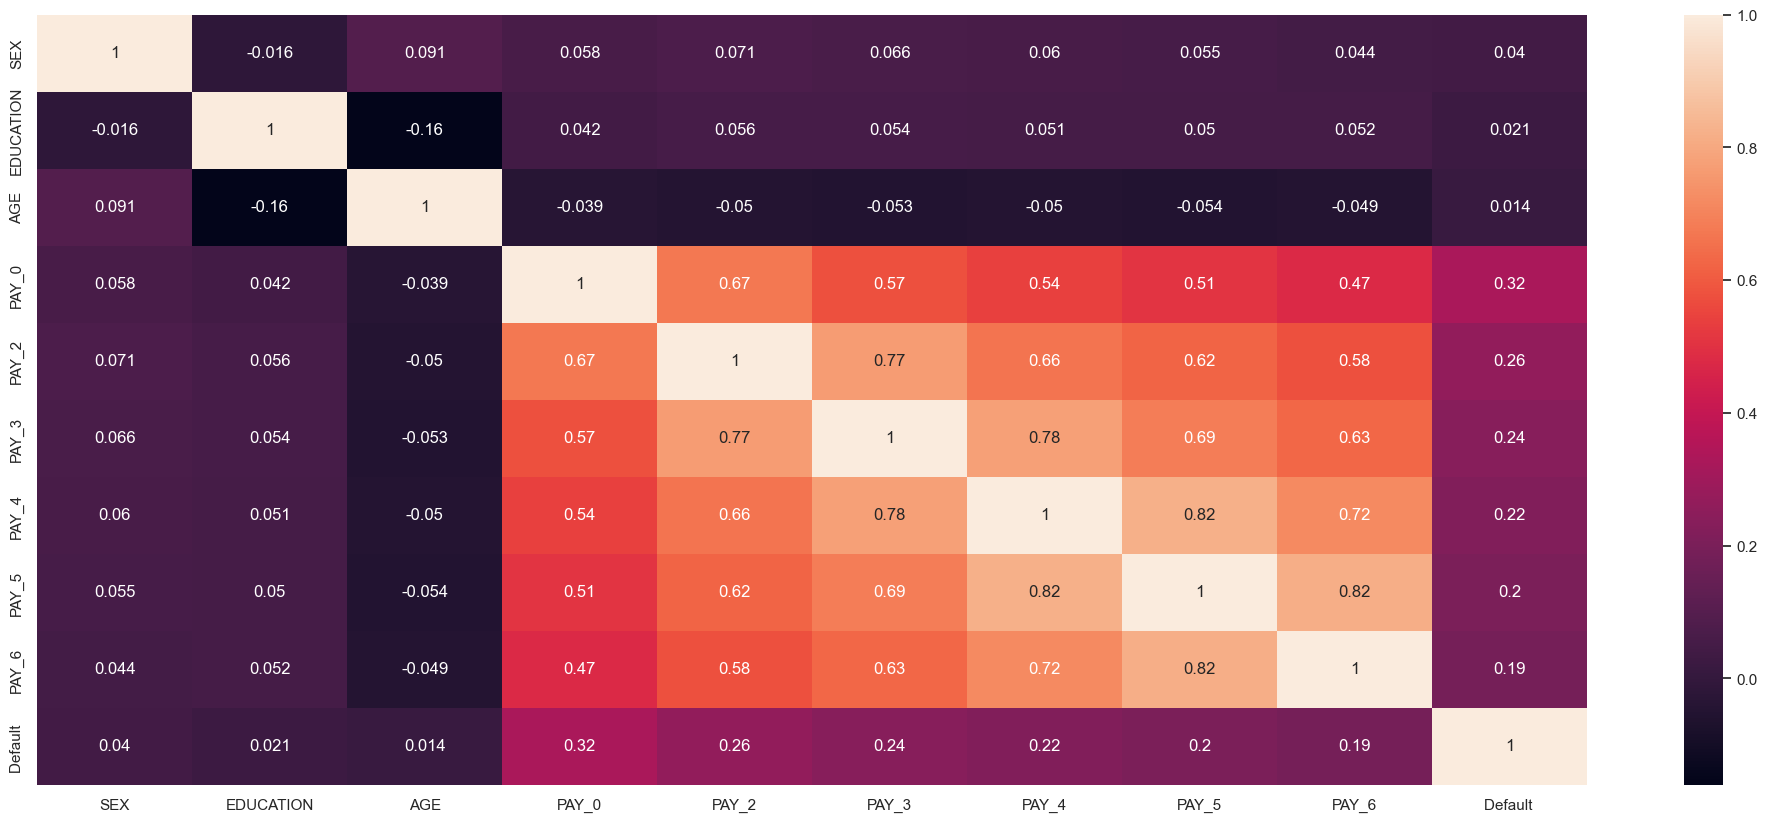

In [20]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

In [21]:
x = data.drop('Default ',axis=1)
y = data['Default ']

In [22]:
# saprate catigorical columns and numerical colums
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6'],
      dtype='object')


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
## nmerical pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

## Catigorical pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# get Preproce3ssor obj
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
])



In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 9)
(24000,)
(6000, 9)
(6000,)


In [27]:
# transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay

In [29]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore
    

In [30]:
logistic = LogisticRegression(class_weight="balanced")

In [31]:
logistic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [32]:
y_predict = logistic.predict(X_test)

In [33]:
y_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
logistic.score(X_train,y_train)

0.7445833333333334

In [35]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[3733  950]
 [ 590  727]]
PRECISION_SCORE: 0.43351222420989866
RECALL_SCORE: 0.5520121488230828
F1_SCORE: 0.48563794255177023
ACCURACY_SCORE: 0.7433333333333333


(None, None, None, None, None)

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4683
           1       0.43      0.55      0.49      1317

    accuracy                           0.74      6000
   macro avg       0.65      0.67      0.66      6000
weighted avg       0.77      0.74      0.75      6000



## Decision Tree

In [37]:
tree = DecisionTreeClassifier(class_weight="balanced")

In [38]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [39]:
tree.score(X_train,y_train)

0.8772083333333334

In [40]:
y_predict = tree.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_predict))

0.7325


In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4683
           1       0.40      0.46      0.43      1317

    accuracy                           0.73      6000
   macro avg       0.62      0.63      0.63      6000
weighted avg       0.74      0.73      0.74      6000



## RandomForest

In [43]:
forest = RandomForestClassifier(class_weight="balanced")

In [44]:
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [45]:
forest.score(X_train,y_train)

0.8928333333333334

In [46]:
y_predict = forest.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_predict))

0.7696666666666667


In [48]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4683
           1       0.47      0.44      0.45      1317

    accuracy                           0.77      6000
   macro avg       0.66      0.65      0.65      6000
weighted avg       0.76      0.77      0.77      6000



## Hyperparameter Tuening

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Logastic Regresion using Hyperparameter Tuening
logestic = LogisticRegression()
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [51]:
grid = GridSearchCV(estimator=logestic,param_grid=params,cv=5)

In [52]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [53]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [54]:
grid.score(X_train,y_train)

0.7791666666666667

In [55]:
y_predict = grid.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_predict))

0.7838333333333334


In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4683
           1       0.51      0.52      0.51      1317

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [58]:
#DicisionTree Using Hyperparameter Tuening
tree1 = DecisionTreeClassifier()
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,10],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [59]:
grid = GridSearchCV(estimator=tree1,param_grid=params,cv=3)

In [60]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [61]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
grid.score(X_train,y_train)

0.7844166666666667

In [63]:
y_predict = grid.predict(X_test)

In [64]:
print(accuracy_score(y_test,y_predict))

0.7878333333333334


In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4683
           1       0.53      0.27      0.36      1317

    accuracy                           0.79      6000
   macro avg       0.68      0.60      0.62      6000
weighted avg       0.76      0.79      0.76      6000



In [66]:
## RandomForest with Hyperparameter Tuening
forest1 = RandomForestClassifier()
params = {
    "class_weight":["balanced"],
    "n_estimators":[150,200],
    'max_depth': [10, 8, 5,20],
    'min_samples_split': [2, 5, 10],
}

In [67]:
grid = GridSearchCV(estimator=forest1,param_grid=params,cv=3)

In [68]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 8, 5, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200]})

In [69]:
grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 150}

In [70]:
grid.score(X_train,y_train)

0.81475

In [71]:
y_predict = grid.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_predict))

0.7956666666666666


In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4683
           1       0.54      0.53      0.53      1317

    accuracy                           0.80      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.80      0.80      6000



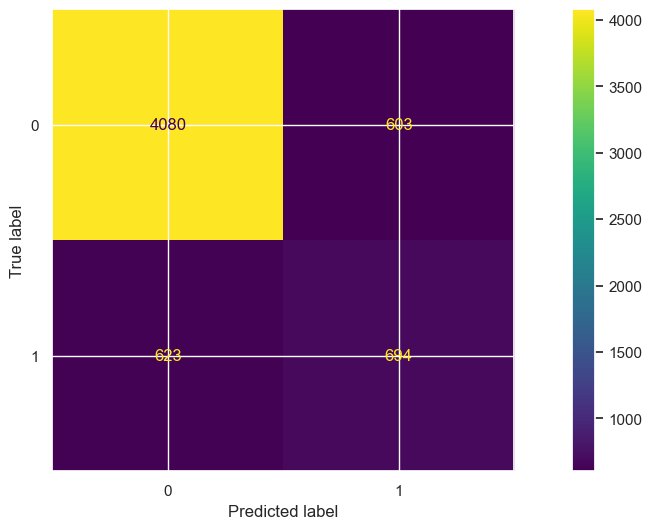

In [74]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [75]:
data.to_csv("clean default of credit card clients.csv",index=False)

In [78]:
# -1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)